## Recreate coherence calculationg from MonkeyG 20150908 Session2 M1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("/media/julien/hdd2tb/lab/elife/data/MonkeyG_20150908_Session2_M1/RecordingBlocks")

In [3]:
import h5py
f =  h5py.File("RecBlock1.mat", 'r')

/home/julien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
print(list(f.keys()))


['lfp_ch01', 'lfp_ch02', 'lfp_ch03', 'lfp_ch04', 'lfp_ch05', 'lfp_ch06', 'lfp_ch07', 'lfp_ch08', 'lfp_ch09', 'lfp_ch10', 'lfp_ch11', 'lfp_ch12', 'lfp_ch13', 'lfp_ch14', 'lfp_ch15', 'lfp_ch16', 'lfp_ch17', 'lfp_ch18', 'lfp_ch19', 'lfp_ch20', 'lfp_ch21', 'lfp_ch22', 'lfp_ch23', 'lfp_ch24', 'lfp_ch25', 'lfp_ch26', 'lfp_ch27', 'lfp_ch28', 'lfp_ch29', 'lfp_ch30', 'lfp_ch31', 'lfp_ch32', 'lfp_ch33', 'lfp_ch34', 'lfp_ch35', 'lfp_ch36', 'lfp_ch37', 'lfp_ch38', 'lfp_ch39', 'lfp_ch40', 'lfp_ch41', 'lfp_ch42', 'lfp_ch43', 'lfp_ch44', 'lfp_ch45', 'lfp_ch46', 'lfp_ch47', 'lfp_ch48', 'lfp_ch49', 'lfp_ch50', 'lfp_ch51', 'lfp_ch52', 'lfp_ch53', 'lfp_ch54', 'lfp_ch55', 'lfp_ch56', 'lfp_ch57', 'lfp_ch58', 'lfp_ch59', 'lfp_ch60', 'lfp_ch61', 'lfp_ch62', 'lfp_ch63', 'lfp_ch64', 'lfp_ch65', 'lfp_ch66', 'lfp_ch67', 'lfp_ch68', 'lfp_ch69', 'lfp_ch70', 'lfp_ch71', 'lfp_ch72', 'lfp_ch73', 'lfp_ch74', 'lfp_ch75', 'lfp_ch76', 'lfp_ch77', 'lfp_ch78', 'lfp_ch79', 'lfp_ch80', 'lfp_ch81', 'lfp_ch82', 'lfp_ch83', 'lf

In [17]:
f['samp_freq'][:]

array([[1017.25260417]])

In [9]:
lfp = f['lfp_ch15'][:]
lfp.shape

(1, 21365)

In [11]:
signals = np.zeros((96, lfp.shape[1]))
i = 0
for key in list(f.keys()):
    if not key.startswith('lfp'):
        continue
    signals[i] = f[key][0]
    i += 1

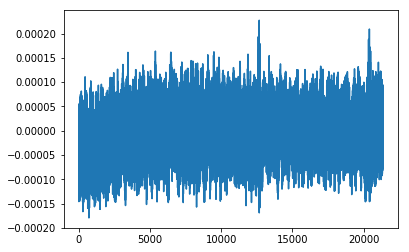

In [12]:
plt.plot(signals[2,:])

In [18]:
from scipy.signal import coherence as coh
from scipy.signal import get_window, hamming

In [19]:
samp_freq = f['samp_freq'][0,0]
Nwin = int(round(10 * samp_freq))
nfft = 16384
nperseg = Nwin
ovlp = int(Nwin/2)


In [26]:
mm = np.zeros((96, 96, 8193))
# corresponds to channel 1, channel 2, frequency

In [65]:
for from_index in range(96):
#     for to_index in range(from_index+1,96):
    for to_index in range(96):
        c = coh(signals[from_index,:], signals[to_index,:], samp_freq, hamming(Nwin), nperseg=nperseg, nfft=nfft, noverlap=ovlp)
        mm[from_index,to_index] = c[1]

        print("finished from " + str(from_index) + " to " + str(to_index))
#     break

finished from 0 to 0
finished from 0 to 1
finished from 0 to 2
finished from 0 to 3
finished from 0 to 4
finished from 0 to 5
finished from 0 to 6
finished from 0 to 7
finished from 0 to 8
finished from 0 to 9
finished from 0 to 10
finished from 0 to 11
finished from 0 to 12
finished from 0 to 13
finished from 0 to 14
finished from 0 to 15
finished from 0 to 16
finished from 0 to 17
finished from 0 to 18
finished from 0 to 19
finished from 0 to 20
finished from 0 to 21
finished from 0 to 22
finished from 0 to 23
finished from 0 to 24
finished from 0 to 25
finished from 0 to 26
finished from 0 to 27
finished from 0 to 28
finished from 0 to 29
finished from 0 to 30
finished from 0 to 31
finished from 0 to 32
finished from 0 to 33
finished from 0 to 34
finished from 0 to 35
finished from 0 to 36
finished from 0 to 37
finished from 0 to 38
finished from 0 to 39
finished from 0 to 40
finished from 0 to 41
finished from 0 to 42
finished from 0 to 43
finished from 0 to 44
finished from 0 to 4

finished from 4 to 0
finished from 4 to 1
finished from 4 to 2
finished from 4 to 3
finished from 4 to 4
finished from 4 to 5
finished from 4 to 6
finished from 4 to 7
finished from 4 to 8
finished from 4 to 9
finished from 4 to 10
finished from 4 to 11
finished from 4 to 12
finished from 4 to 13
finished from 4 to 14
finished from 4 to 15
finished from 4 to 16
finished from 4 to 17
finished from 4 to 18
finished from 4 to 19
finished from 4 to 20
finished from 4 to 21
finished from 4 to 22
finished from 4 to 23
finished from 4 to 24
finished from 4 to 25
finished from 4 to 26
finished from 4 to 27
finished from 4 to 28
finished from 4 to 29
finished from 4 to 30
finished from 4 to 31
finished from 4 to 32
finished from 4 to 33
finished from 4 to 34
finished from 4 to 35
finished from 4 to 36
finished from 4 to 37
finished from 4 to 38
finished from 4 to 39
finished from 4 to 40
finished from 4 to 41
finished from 4 to 42
finished from 4 to 43
finished from 4 to 44
finished from 4 to 4

finished from 8 to 41
finished from 8 to 42
finished from 8 to 43
finished from 8 to 44
finished from 8 to 45
finished from 8 to 46
finished from 8 to 47
finished from 8 to 48
finished from 8 to 49
finished from 8 to 50
finished from 8 to 51
finished from 8 to 52
finished from 8 to 53
finished from 8 to 54
finished from 8 to 55
finished from 8 to 56
finished from 8 to 57
finished from 8 to 58
finished from 8 to 59
finished from 8 to 60
finished from 8 to 61
finished from 8 to 62
finished from 8 to 63
finished from 8 to 64
finished from 8 to 65
finished from 8 to 66
finished from 8 to 67
finished from 8 to 68
finished from 8 to 69
finished from 8 to 70
finished from 8 to 71
finished from 8 to 72
finished from 8 to 73
finished from 8 to 74
finished from 8 to 75
finished from 8 to 76
finished from 8 to 77
finished from 8 to 78
finished from 8 to 79
finished from 8 to 80
finished from 8 to 81
finished from 8 to 82
finished from 8 to 83
finished from 8 to 84
finished from 8 to 85
finished f

finished from 12 to 38
finished from 12 to 39
finished from 12 to 40
finished from 12 to 41
finished from 12 to 42
finished from 12 to 43
finished from 12 to 44
finished from 12 to 45
finished from 12 to 46
finished from 12 to 47
finished from 12 to 48
finished from 12 to 49
finished from 12 to 50
finished from 12 to 51
finished from 12 to 52
finished from 12 to 53
finished from 12 to 54
finished from 12 to 55
finished from 12 to 56
finished from 12 to 57
finished from 12 to 58
finished from 12 to 59
finished from 12 to 60
finished from 12 to 61
finished from 12 to 62
finished from 12 to 63
finished from 12 to 64
finished from 12 to 65
finished from 12 to 66
finished from 12 to 67
finished from 12 to 68
finished from 12 to 69
finished from 12 to 70
finished from 12 to 71
finished from 12 to 72
finished from 12 to 73
finished from 12 to 74
finished from 12 to 75
finished from 12 to 76
finished from 12 to 77
finished from 12 to 78
finished from 12 to 79
finished from 12 to 80
finished fr

finished from 16 to 53
finished from 16 to 54
finished from 16 to 55
finished from 16 to 56
finished from 16 to 57
finished from 16 to 58
finished from 16 to 59
finished from 16 to 60
finished from 16 to 61
finished from 16 to 62
finished from 16 to 63
finished from 16 to 64
finished from 16 to 65
finished from 16 to 66
finished from 16 to 67
finished from 16 to 68
finished from 16 to 69
finished from 16 to 70
finished from 16 to 71
finished from 16 to 72
finished from 16 to 73
finished from 16 to 74
finished from 16 to 75
finished from 16 to 76
finished from 16 to 77
finished from 16 to 78
finished from 16 to 79
finished from 16 to 80
finished from 16 to 81
finished from 16 to 82
finished from 16 to 83
finished from 16 to 84
finished from 16 to 85
finished from 16 to 86
finished from 16 to 87
finished from 16 to 88
finished from 16 to 89
finished from 16 to 90
finished from 16 to 91
finished from 16 to 92
finished from 16 to 93
finished from 16 to 94
finished from 16 to 95
finished fr

finished from 21 to 5
finished from 21 to 6
finished from 21 to 7
finished from 21 to 8
finished from 21 to 9
finished from 21 to 10
finished from 21 to 11
finished from 21 to 12
finished from 21 to 13
finished from 21 to 14
finished from 21 to 15
finished from 21 to 16
finished from 21 to 17
finished from 21 to 18
finished from 21 to 19
finished from 21 to 20
finished from 21 to 21
finished from 21 to 22
finished from 21 to 23
finished from 21 to 24
finished from 21 to 25
finished from 21 to 26
finished from 21 to 27
finished from 21 to 28
finished from 21 to 29
finished from 21 to 30
finished from 21 to 31
finished from 21 to 32
finished from 21 to 33
finished from 21 to 34
finished from 21 to 35
finished from 21 to 36
finished from 21 to 37
finished from 21 to 38
finished from 21 to 39
finished from 21 to 40
finished from 21 to 41
finished from 21 to 42
finished from 21 to 43
finished from 21 to 44
finished from 21 to 45
finished from 21 to 46
finished from 21 to 47
finished from 21

finished from 25 to 37
finished from 25 to 38
finished from 25 to 39
finished from 25 to 40
finished from 25 to 41
finished from 25 to 42
finished from 25 to 43
finished from 25 to 44
finished from 25 to 45
finished from 25 to 46
finished from 25 to 47
finished from 25 to 48
finished from 25 to 49
finished from 25 to 50
finished from 25 to 51
finished from 25 to 52
finished from 25 to 53
finished from 25 to 54
finished from 25 to 55
finished from 25 to 56
finished from 25 to 57
finished from 25 to 58
finished from 25 to 59
finished from 25 to 60
finished from 25 to 61
finished from 25 to 62
finished from 25 to 63
finished from 25 to 64
finished from 25 to 65
finished from 25 to 66
finished from 25 to 67
finished from 25 to 68
finished from 25 to 69
finished from 25 to 70
finished from 25 to 71
finished from 25 to 72
finished from 25 to 73
finished from 25 to 74
finished from 25 to 75
finished from 25 to 76
finished from 25 to 77
finished from 25 to 78
finished from 25 to 79
finished fr

finished from 29 to 89
finished from 29 to 90
finished from 29 to 91
finished from 29 to 92
finished from 29 to 93
finished from 29 to 94
finished from 29 to 95
finished from 30 to 0
finished from 30 to 1
finished from 30 to 2
finished from 30 to 3
finished from 30 to 4
finished from 30 to 5
finished from 30 to 6
finished from 30 to 7
finished from 30 to 8
finished from 30 to 9
finished from 30 to 10
finished from 30 to 11
finished from 30 to 12
finished from 30 to 13
finished from 30 to 14
finished from 30 to 15
finished from 30 to 16
finished from 30 to 17
finished from 30 to 18
finished from 30 to 19
finished from 30 to 20
finished from 30 to 21
finished from 30 to 22
finished from 30 to 23
finished from 30 to 24
finished from 30 to 25
finished from 30 to 26
finished from 30 to 27
finished from 30 to 28
finished from 30 to 29
finished from 30 to 30
finished from 30 to 31
finished from 30 to 32
finished from 30 to 33
finished from 30 to 34
finished from 30 to 35
finished from 30 to 3

finished from 34 to 17
finished from 34 to 18
finished from 34 to 19
finished from 34 to 20
finished from 34 to 21
finished from 34 to 22
finished from 34 to 23
finished from 34 to 24
finished from 34 to 25
finished from 34 to 26
finished from 34 to 27
finished from 34 to 28
finished from 34 to 29
finished from 34 to 30
finished from 34 to 31
finished from 34 to 32
finished from 34 to 33
finished from 34 to 34
finished from 34 to 35
finished from 34 to 36
finished from 34 to 37
finished from 34 to 38
finished from 34 to 39
finished from 34 to 40
finished from 34 to 41
finished from 34 to 42
finished from 34 to 43
finished from 34 to 44
finished from 34 to 45
finished from 34 to 46
finished from 34 to 47
finished from 34 to 48
finished from 34 to 49
finished from 34 to 50
finished from 34 to 51
finished from 34 to 52
finished from 34 to 53
finished from 34 to 54
finished from 34 to 55
finished from 34 to 56
finished from 34 to 57
finished from 34 to 58
finished from 34 to 59
finished fr

finished from 38 to 46
finished from 38 to 47
finished from 38 to 48
finished from 38 to 49
finished from 38 to 50
finished from 38 to 51
finished from 38 to 52
finished from 38 to 53
finished from 38 to 54
finished from 38 to 55
finished from 38 to 56
finished from 38 to 57
finished from 38 to 58
finished from 38 to 59
finished from 38 to 60
finished from 38 to 61
finished from 38 to 62
finished from 38 to 63
finished from 38 to 64
finished from 38 to 65
finished from 38 to 66
finished from 38 to 67
finished from 38 to 68
finished from 38 to 69
finished from 38 to 70
finished from 38 to 71
finished from 38 to 72
finished from 38 to 73
finished from 38 to 74
finished from 38 to 75
finished from 38 to 76
finished from 38 to 77
finished from 38 to 78
finished from 38 to 79
finished from 38 to 80
finished from 38 to 81
finished from 38 to 82
finished from 38 to 83
finished from 38 to 84
finished from 38 to 85
finished from 38 to 86
finished from 38 to 87
finished from 38 to 88
finished fr

finished from 42 to 80
finished from 42 to 81
finished from 42 to 82
finished from 42 to 83
finished from 42 to 84
finished from 42 to 85
finished from 42 to 86
finished from 42 to 87
finished from 42 to 88
finished from 42 to 89
finished from 42 to 90
finished from 42 to 91
finished from 42 to 92
finished from 42 to 93
finished from 42 to 94
finished from 42 to 95
finished from 43 to 0
finished from 43 to 1
finished from 43 to 2
finished from 43 to 3
finished from 43 to 4
finished from 43 to 5
finished from 43 to 6
finished from 43 to 7
finished from 43 to 8
finished from 43 to 9
finished from 43 to 10
finished from 43 to 11
finished from 43 to 12
finished from 43 to 13
finished from 43 to 14
finished from 43 to 15
finished from 43 to 16
finished from 43 to 17
finished from 43 to 18
finished from 43 to 19
finished from 43 to 20
finished from 43 to 21
finished from 43 to 22
finished from 43 to 23
finished from 43 to 24
finished from 43 to 25
finished from 43 to 26
finished from 43 to 2

finished from 47 to 10
finished from 47 to 11
finished from 47 to 12
finished from 47 to 13
finished from 47 to 14
finished from 47 to 15
finished from 47 to 16
finished from 47 to 17
finished from 47 to 18
finished from 47 to 19
finished from 47 to 20
finished from 47 to 21
finished from 47 to 22
finished from 47 to 23
finished from 47 to 24
finished from 47 to 25
finished from 47 to 26
finished from 47 to 27
finished from 47 to 28
finished from 47 to 29
finished from 47 to 30
finished from 47 to 31
finished from 47 to 32
finished from 47 to 33
finished from 47 to 34
finished from 47 to 35
finished from 47 to 36
finished from 47 to 37
finished from 47 to 38
finished from 47 to 39
finished from 47 to 40
finished from 47 to 41
finished from 47 to 42
finished from 47 to 43
finished from 47 to 44
finished from 47 to 45
finished from 47 to 46
finished from 47 to 47
finished from 47 to 48
finished from 47 to 49
finished from 47 to 50
finished from 47 to 51
finished from 47 to 52
finished fr

finished from 50 to 90
finished from 50 to 91
finished from 50 to 92
finished from 50 to 93
finished from 50 to 94
finished from 50 to 95
finished from 51 to 0
finished from 51 to 1
finished from 51 to 2
finished from 51 to 3
finished from 51 to 4
finished from 51 to 5
finished from 51 to 6
finished from 51 to 7
finished from 51 to 8
finished from 51 to 9
finished from 51 to 10
finished from 51 to 11
finished from 51 to 12
finished from 51 to 13
finished from 51 to 14
finished from 51 to 15
finished from 51 to 16
finished from 51 to 17
finished from 51 to 18
finished from 51 to 19
finished from 51 to 20
finished from 51 to 21
finished from 51 to 22
finished from 51 to 23
finished from 51 to 24
finished from 51 to 25
finished from 51 to 26
finished from 51 to 27
finished from 51 to 28
finished from 51 to 29
finished from 51 to 30
finished from 51 to 31
finished from 51 to 32
finished from 51 to 33
finished from 51 to 34
finished from 51 to 35
finished from 51 to 36
finished from 51 to 3

finished from 55 to 37
finished from 55 to 38
finished from 55 to 39
finished from 55 to 40
finished from 55 to 41
finished from 55 to 42
finished from 55 to 43
finished from 55 to 44
finished from 55 to 45
finished from 55 to 46
finished from 55 to 47
finished from 55 to 48
finished from 55 to 49
finished from 55 to 50
finished from 55 to 51
finished from 55 to 52
finished from 55 to 53
finished from 55 to 54
finished from 55 to 55
finished from 55 to 56
finished from 55 to 57
finished from 55 to 58
finished from 55 to 59
finished from 55 to 60
finished from 55 to 61
finished from 55 to 62
finished from 55 to 63
finished from 55 to 64
finished from 55 to 65
finished from 55 to 66
finished from 55 to 67
finished from 55 to 68
finished from 55 to 69
finished from 55 to 70
finished from 55 to 71
finished from 55 to 72
finished from 55 to 73
finished from 55 to 74
finished from 55 to 75
finished from 55 to 76
finished from 55 to 77
finished from 55 to 78
finished from 55 to 79
finished fr

finished from 59 to 82
finished from 59 to 83
finished from 59 to 84
finished from 59 to 85
finished from 59 to 86
finished from 59 to 87
finished from 59 to 88
finished from 59 to 89
finished from 59 to 90
finished from 59 to 91
finished from 59 to 92
finished from 59 to 93
finished from 59 to 94
finished from 59 to 95
finished from 60 to 0
finished from 60 to 1
finished from 60 to 2
finished from 60 to 3
finished from 60 to 4
finished from 60 to 5
finished from 60 to 6
finished from 60 to 7
finished from 60 to 8
finished from 60 to 9
finished from 60 to 10
finished from 60 to 11
finished from 60 to 12
finished from 60 to 13
finished from 60 to 14
finished from 60 to 15
finished from 60 to 16
finished from 60 to 17
finished from 60 to 18
finished from 60 to 19
finished from 60 to 20
finished from 60 to 21
finished from 60 to 22
finished from 60 to 23
finished from 60 to 24
finished from 60 to 25
finished from 60 to 26
finished from 60 to 27
finished from 60 to 28
finished from 60 to 2

finished from 64 to 3
finished from 64 to 4
finished from 64 to 5
finished from 64 to 6
finished from 64 to 7
finished from 64 to 8
finished from 64 to 9
finished from 64 to 10
finished from 64 to 11
finished from 64 to 12
finished from 64 to 13
finished from 64 to 14
finished from 64 to 15
finished from 64 to 16
finished from 64 to 17
finished from 64 to 18
finished from 64 to 19
finished from 64 to 20
finished from 64 to 21
finished from 64 to 22
finished from 64 to 23
finished from 64 to 24
finished from 64 to 25
finished from 64 to 26
finished from 64 to 27
finished from 64 to 28
finished from 64 to 29
finished from 64 to 30
finished from 64 to 31
finished from 64 to 32
finished from 64 to 33
finished from 64 to 34
finished from 64 to 35
finished from 64 to 36
finished from 64 to 37
finished from 64 to 38
finished from 64 to 39
finished from 64 to 40
finished from 64 to 41
finished from 64 to 42
finished from 64 to 43
finished from 64 to 44
finished from 64 to 45
finished from 64 t

finished from 68 to 16
finished from 68 to 17
finished from 68 to 18
finished from 68 to 19
finished from 68 to 20
finished from 68 to 21
finished from 68 to 22
finished from 68 to 23
finished from 68 to 24
finished from 68 to 25
finished from 68 to 26
finished from 68 to 27
finished from 68 to 28
finished from 68 to 29
finished from 68 to 30
finished from 68 to 31
finished from 68 to 32
finished from 68 to 33
finished from 68 to 34
finished from 68 to 35
finished from 68 to 36
finished from 68 to 37
finished from 68 to 38
finished from 68 to 39
finished from 68 to 40
finished from 68 to 41
finished from 68 to 42
finished from 68 to 43
finished from 68 to 44
finished from 68 to 45
finished from 68 to 46
finished from 68 to 47
finished from 68 to 48
finished from 68 to 49
finished from 68 to 50
finished from 68 to 51
finished from 68 to 52
finished from 68 to 53
finished from 68 to 54
finished from 68 to 55
finished from 68 to 56
finished from 68 to 57
finished from 68 to 58
finished fr

finished from 72 to 39
finished from 72 to 40
finished from 72 to 41
finished from 72 to 42
finished from 72 to 43
finished from 72 to 44
finished from 72 to 45
finished from 72 to 46
finished from 72 to 47
finished from 72 to 48
finished from 72 to 49
finished from 72 to 50
finished from 72 to 51
finished from 72 to 52
finished from 72 to 53
finished from 72 to 54
finished from 72 to 55
finished from 72 to 56
finished from 72 to 57
finished from 72 to 58
finished from 72 to 59
finished from 72 to 60
finished from 72 to 61
finished from 72 to 62
finished from 72 to 63
finished from 72 to 64
finished from 72 to 65
finished from 72 to 66
finished from 72 to 67
finished from 72 to 68
finished from 72 to 69
finished from 72 to 70
finished from 72 to 71
finished from 72 to 72
finished from 72 to 73
finished from 72 to 74
finished from 72 to 75
finished from 72 to 76
finished from 72 to 77
finished from 72 to 78
finished from 72 to 79
finished from 72 to 80
finished from 72 to 81
finished fr

finished from 76 to 71
finished from 76 to 72
finished from 76 to 73
finished from 76 to 74
finished from 76 to 75
finished from 76 to 76
finished from 76 to 77
finished from 76 to 78
finished from 76 to 79
finished from 76 to 80
finished from 76 to 81
finished from 76 to 82
finished from 76 to 83
finished from 76 to 84
finished from 76 to 85
finished from 76 to 86
finished from 76 to 87
finished from 76 to 88
finished from 76 to 89
finished from 76 to 90
finished from 76 to 91
finished from 76 to 92
finished from 76 to 93
finished from 76 to 94
finished from 76 to 95
finished from 77 to 0
finished from 77 to 1
finished from 77 to 2
finished from 77 to 3
finished from 77 to 4
finished from 77 to 5
finished from 77 to 6
finished from 77 to 7
finished from 77 to 8
finished from 77 to 9
finished from 77 to 10
finished from 77 to 11
finished from 77 to 12
finished from 77 to 13
finished from 77 to 14
finished from 77 to 15
finished from 77 to 16
finished from 77 to 17
finished from 77 to 1

finished from 80 to 60
finished from 80 to 61
finished from 80 to 62
finished from 80 to 63
finished from 80 to 64
finished from 80 to 65
finished from 80 to 66
finished from 80 to 67
finished from 80 to 68
finished from 80 to 69
finished from 80 to 70
finished from 80 to 71
finished from 80 to 72
finished from 80 to 73
finished from 80 to 74
finished from 80 to 75
finished from 80 to 76
finished from 80 to 77
finished from 80 to 78
finished from 80 to 79
finished from 80 to 80
finished from 80 to 81
finished from 80 to 82
finished from 80 to 83
finished from 80 to 84
finished from 80 to 85
finished from 80 to 86
finished from 80 to 87
finished from 80 to 88
finished from 80 to 89
finished from 80 to 90
finished from 80 to 91
finished from 80 to 92
finished from 80 to 93
finished from 80 to 94
finished from 80 to 95
finished from 81 to 0
finished from 81 to 1
finished from 81 to 2
finished from 81 to 3
finished from 81 to 4
finished from 81 to 5
finished from 81 to 6
finished from 81 t

finished from 85 to 10
finished from 85 to 11
finished from 85 to 12
finished from 85 to 13
finished from 85 to 14
finished from 85 to 15
finished from 85 to 16
finished from 85 to 17
finished from 85 to 18
finished from 85 to 19
finished from 85 to 20
finished from 85 to 21
finished from 85 to 22
finished from 85 to 23
finished from 85 to 24
finished from 85 to 25
finished from 85 to 26
finished from 85 to 27
finished from 85 to 28
finished from 85 to 29
finished from 85 to 30
finished from 85 to 31
finished from 85 to 32
finished from 85 to 33
finished from 85 to 34
finished from 85 to 35
finished from 85 to 36
finished from 85 to 37
finished from 85 to 38
finished from 85 to 39
finished from 85 to 40
finished from 85 to 41
finished from 85 to 42
finished from 85 to 43
finished from 85 to 44
finished from 85 to 45
finished from 85 to 46
finished from 85 to 47
finished from 85 to 48
finished from 85 to 49
finished from 85 to 50
finished from 85 to 51
finished from 85 to 52
finished fr

finished from 88 to 84
finished from 88 to 85
finished from 88 to 86
finished from 88 to 87
finished from 88 to 88
finished from 88 to 89
finished from 88 to 90
finished from 88 to 91
finished from 88 to 92
finished from 88 to 93
finished from 88 to 94
finished from 88 to 95
finished from 89 to 0
finished from 89 to 1
finished from 89 to 2
finished from 89 to 3
finished from 89 to 4
finished from 89 to 5
finished from 89 to 6
finished from 89 to 7
finished from 89 to 8
finished from 89 to 9
finished from 89 to 10
finished from 89 to 11
finished from 89 to 12
finished from 89 to 13
finished from 89 to 14
finished from 89 to 15
finished from 89 to 16
finished from 89 to 17
finished from 89 to 18
finished from 89 to 19
finished from 89 to 20
finished from 89 to 21
finished from 89 to 22
finished from 89 to 23
finished from 89 to 24
finished from 89 to 25
finished from 89 to 26
finished from 89 to 27
finished from 89 to 28
finished from 89 to 29
finished from 89 to 30
finished from 89 to 3

finished from 93 to 29
finished from 93 to 30
finished from 93 to 31
finished from 93 to 32
finished from 93 to 33
finished from 93 to 34
finished from 93 to 35
finished from 93 to 36
finished from 93 to 37
finished from 93 to 38
finished from 93 to 39
finished from 93 to 40
finished from 93 to 41
finished from 93 to 42
finished from 93 to 43
finished from 93 to 44
finished from 93 to 45
finished from 93 to 46
finished from 93 to 47
finished from 93 to 48
finished from 93 to 49
finished from 93 to 50
finished from 93 to 51
finished from 93 to 52
finished from 93 to 53
finished from 93 to 54
finished from 93 to 55
finished from 93 to 56
finished from 93 to 57
finished from 93 to 58
finished from 93 to 59
finished from 93 to 60
finished from 93 to 61
finished from 93 to 62
finished from 93 to 63
finished from 93 to 64
finished from 93 to 65
finished from 93 to 66
finished from 93 to 67
finished from 93 to 68
finished from 93 to 69
finished from 93 to 70
finished from 93 to 71
finished fr

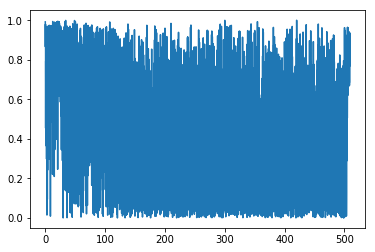

In [66]:
plt.plot(c[0], mm[44, 53])

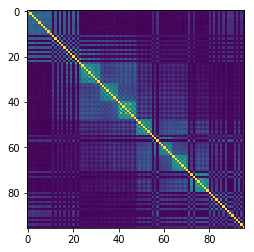

In [67]:
plt.imshow(mm.mean(axis=2))

In [68]:
index = 0
first = True
for i in c[0]:
    if i > 7:
        print("ending index is " + str(index))
        end_index = index
        break
    if (i > 4 and first==True):
        print("starting index is " + str(index))
        start_index = index
        first = False
    index += 1

starting index is 65
ending index is 113


In [69]:
theta_mm = mm[:,:,start_index:end_index]

In [70]:
theta_mm.shape

(96, 96, 48)

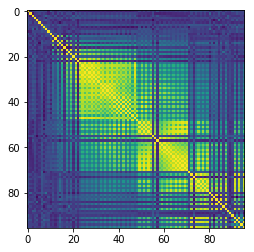

In [71]:
plt.imshow(theta_mm.mean(axis=2))

In [75]:
theta_means_mm = theta_mm.mean(axis=2)

In [72]:
from sklearn.cluster import DBSCAN

In [76]:
clusters = DBSCAN().fit(theta_means_mm)

In [81]:
lab = clusters.labels_

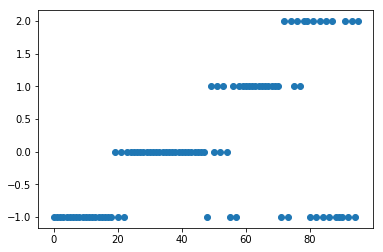

In [84]:
plt.scatter(range(96), lab)

In [87]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=2)

In [90]:
pca.fit(theta_means_mm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [91]:
pca.singular_values_

array([13.35583651,  9.04492495])

In [93]:
trans_theta = pca.transform(theta_means_mm)

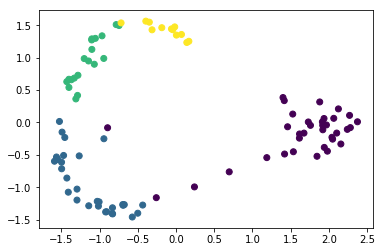

In [97]:
plt.scatter(trans_theta[:,0], trans_theta[:,1], c=lab)